In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def get_len(line : np.array, fig : plt.Figure, pos, name, print_max = False, x = None):
    ax = fig.add_subplot(pos)
    if type(x) == type(None):
        ax.plot(line)
    else:
        ax.plot(x, line)
    if print_max:
        max = np.max(line)
        idx = np.where(line == max)[0]
        for id, indx in enumerate(idx):
            ax.plot([indx]*(int(max)+1), np.arange(0, int(max)+1), '--r')
            ax.text(indx, 0, 'Максимум в '+str(indx))
    plt.title(name)


1. Создайте  два  сигнала  x1=cos(2*pi*f1*t);  x2=4*cos(2*pi*f2*t); 
Частота дискретизации 4096, время анализа 1 секунда. Частоты f1 и f2 
равны 100 и 350 Гц. Получите модуль спектра двух сигналов, постройте 

In [127]:
x = np.arange(0, 1, 1/4096)

In [128]:
def f(x, f, A=1):
    return A*np.cos(2*np.pi*f*x)

In [129]:
ff = 0.5*np.cos(2*np.pi*100*x)+0.5*np.cos(2*np.pi*3996*x)

In [130]:
f1 = f(x, 100)
f2 = f(x, 350, 4)

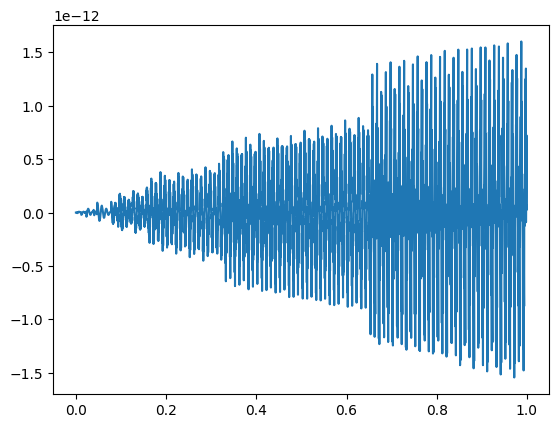

In [131]:
plt.plot(x, ff -f1)

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\462119855.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


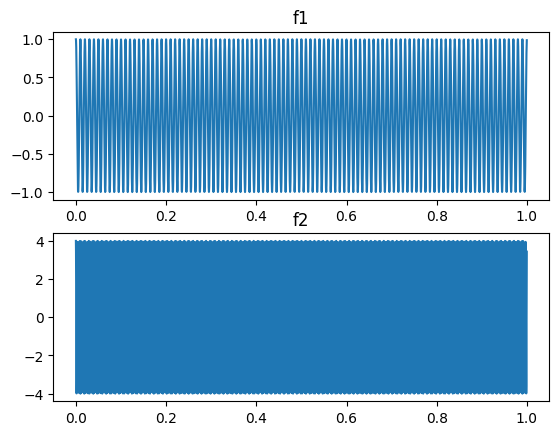

In [132]:
fig = plt.figure()
get_len(f1, fig, 211, 'f1', x= x)
get_len(f2, fig, 212, 'f2', x= x)
fig.show()

In [133]:
abs_fft_f1 = np.abs(np.fft.fft(f1)/len(f1))
abs_fft_f2 = np.abs(np.fft.fft(f2)/len(f2))

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\1695220816.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


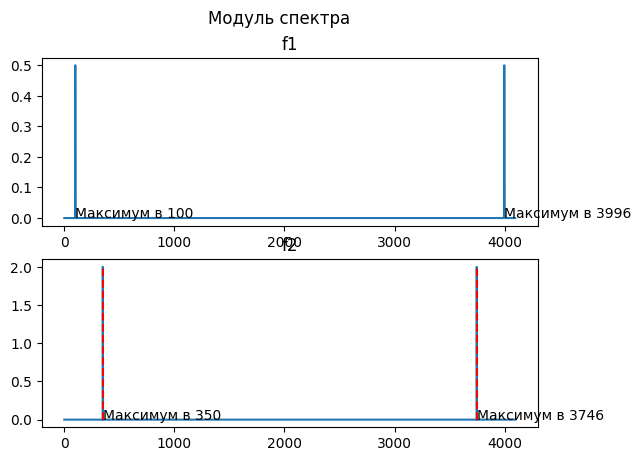

In [134]:
fig = plt.figure()
fig.suptitle("Модуль спектра ")
get_len(abs_fft_f1, fig, 211, 'f1', True)
get_len(abs_fft_f2, fig, 212, 'f2', True)
fig.show()

2. Создайте  еще  два  сигнала:  x3=x1+x2;  x4=x1.*x2 и  постройте  их спектры. Объясните полученный результат. 

In [135]:
f3 = f1+f2
f4 = f1*f2

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\3257139670.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


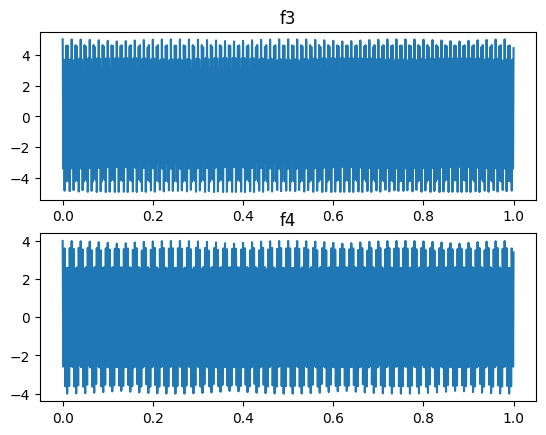

In [136]:
fig = plt.figure()
get_len(f3, fig, 211, 'f3', x= x)
get_len(f4, fig, 212, 'f4', x= x)
fig.show()

In [137]:
abs_fft_f3 = np.abs(np.fft.fft(f3)/len(f3))
abs_fft_f4 = np.abs(np.fft.fft(f4)/len(f4))

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\1327434908.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


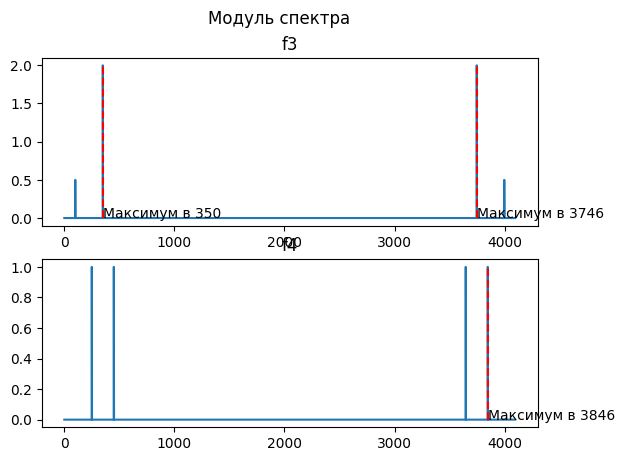

In [138]:
fig = plt.figure()
fig.suptitle("Модуль спектра ")
get_len(abs_fft_f3, fig, 211, 'f3', True)
get_len(abs_fft_f4, fig, 212, 'f4', True)
fig.show()

3. На временном интервале 72N =  отсчетов создайте  -импульс (на один 
отчет  выставить  1) и  получите  его  спектр  (модуль  и  фазу).  Как 
изменяется спектр, если сдвинуть  -импульс?

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\1281006633.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


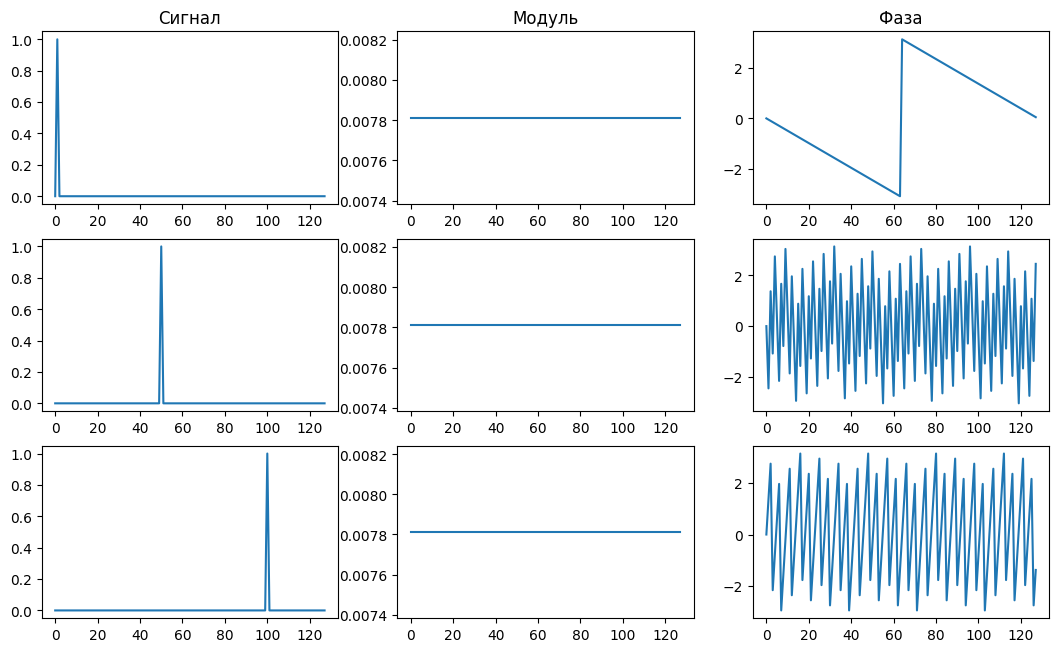

In [139]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i in enumerate([1, 50, 100]):
    x = np.array([0]*2**7)
    x[i[1]] = 1
    if i[0] == 0:
        get_len(x, fig, 530+i[0]*3+1, 'Сигнал', x = np.arange(2**7))
        get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, 'Модуль')
        get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, 'Фаза')
        continue
    get_len(x, fig, 530+i[0]*3+1, '', x = np.arange(2**7))
    get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, '')
    get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, '')

fig.show()

4. Из  пункта  3  возьмите  импульс  и  в цикле  for последовательно 
увеличивайте ширину импульса с шагом 8, наблюдая соответствующие 
изменения  его  спектра. Сделайте  10  этапов  моделирования. Для 
произвольной ширины импульса рассчитайте спектр вручную. Сделайте 
выводы.

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\2322088719.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


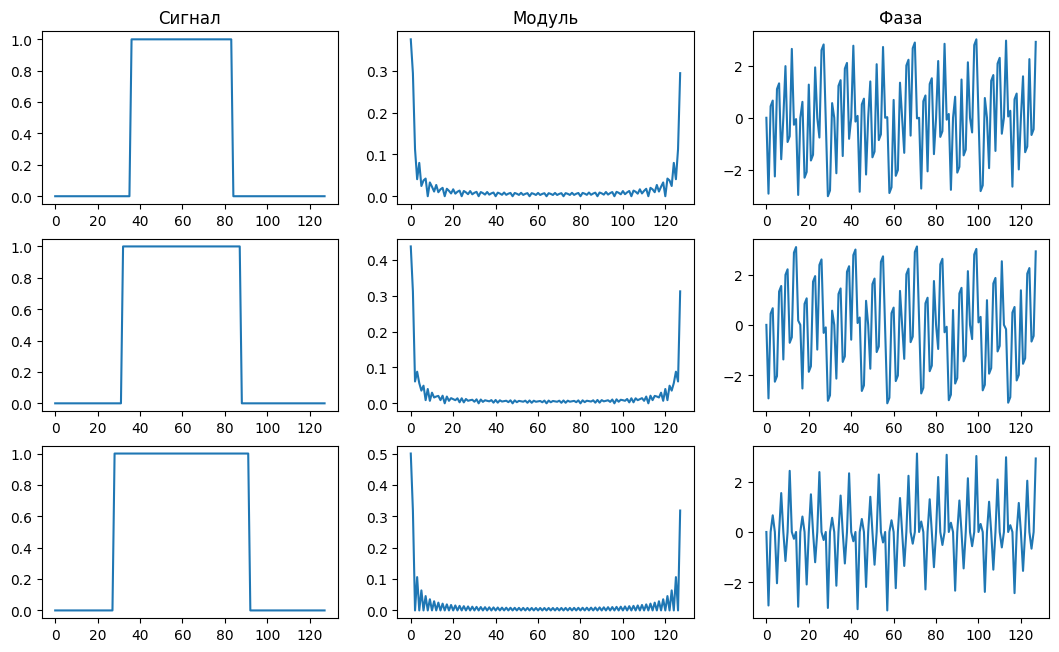

In [140]:
fig = plt.figure()
fig.set_size_inches(13, 13)
k = 60
for i in enumerate(range(6,9)):
    x = np.array([0]*2**7)
    x[-i[1]*4+k:k+i[1]*4] = 1
    if i[0] == 0:
        x[k] = 1
        get_len(x, fig, 530+i[0]*3+1, 'Сигнал', x = np.arange(2**7))
        get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, 'Модуль')
        get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, 'Фаза')
        continue
    get_len(x, fig, 530+i[0]*3+1, '', x = np.arange(2**7))
    get_len(np.abs(np.fft.fft(x)/len(x)), fig, 530+i[0]*3+2, '')
    get_len(np.angle(np.fft.fft(x)), fig, 530+i[0]*3+3, '')

fig.show()

In [141]:
import pandas as pd

In [144]:
x = np.array([0]*2**7)
x[-3*4+k:k+3*4] = 1

fur = []
for N in range(len(x)):
    fur.append(0)
    for n in range(len(x)):
        fur[N] += x[n]*(np.cos(2*np.pi*N*n/len(x))-1j*np.sin(2*np.pi*N*n/len(x)))

fur = np.array(fur)

data = {
    'X':x,
    'Модуль': np.abs(fur),
    'Фаза':np.angle(fur)
    }
data = pd.DataFrame(data)
data.to_csv('./data/data.csv')

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\2190747022.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


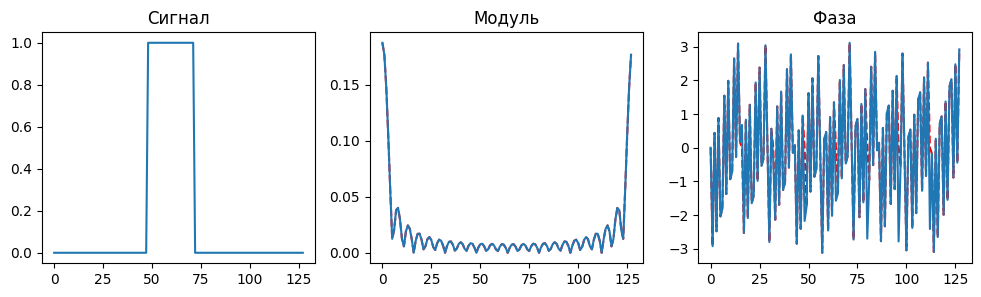

In [156]:
fig = plt.figure()
fig.set_size_inches(12, 3)
get_len(x, fig, 131, 'Сигнал', x = np.arange(2**7))
ax = fig.add_subplot(132)
ax.plot(np.abs(np.fft.fft(x)/len(x)), 'r--')
ax.plot(np.abs(fur/len(x)))
plt.title('Модуль')
ax = fig.add_subplot(133)
ax.plot(np.angle(np.fft.fft(x)), 'r--')
ax.plot(np.angle(fur))
plt.title('Фаза')
fig.show()

5.  На  том  же  временном  интервале  создайте  периодический 
прямоугольный  сигнал  со  скважностью  2  (меандр)  и  количеством 
периодов,  кратным  двум.    Постройте  его  спектр.  Рассчитайте  спектр 
вручную. 

In [158]:
x = np.array([0]*2**7)
for i in range(14):
    x[1+i*10:6+i*10] = 1

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\3604544378.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


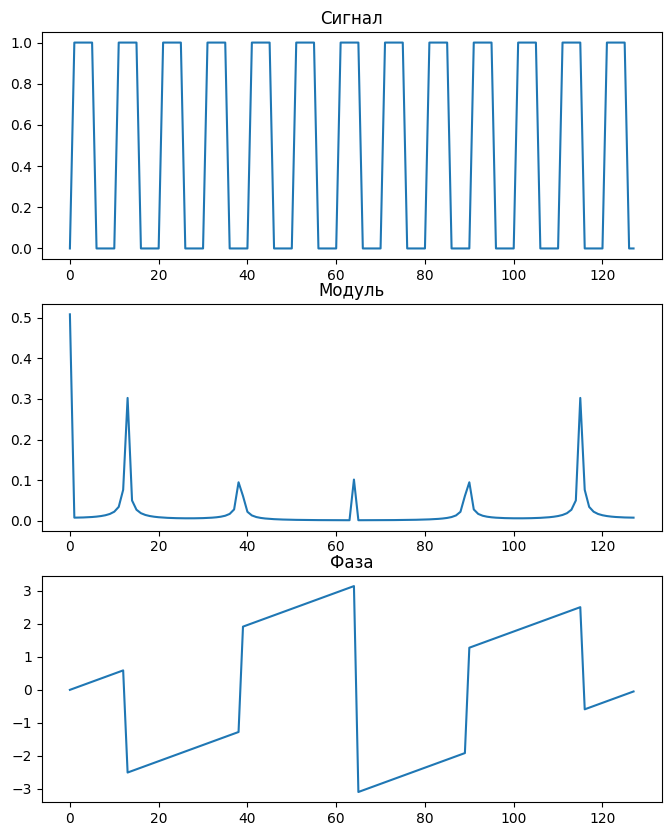

In [161]:
fig = plt.figure()
fig.set_size_inches(8, 10)
get_len(x, fig, 311, 'Сигнал')
get_len(np.abs(np.fft.fft(x)/len(x)), fig, 312, 'Модуль')
get_len(np.angle(np.fft.fft(x)), fig, 313, 'Фаза')
fig.show()

In [162]:
fur = []
for N in range(len(x)):
    fur.append(0)
    for n in range(len(x)):
        fur[N] += x[n]*(np.cos(2*np.pi*N*n/len(x))-1j*np.sin(2*np.pi*N*n/len(x)))

fur = np.array(fur)

data = {
    'X':x,
    'Модуль': np.abs(fur),
    'Фаза':np.angle(fur)
    }
data = pd.DataFrame(data)
data.to_csv('./data/data1.csv')

C:\Users\Filic\AppData\Local\Temp\ipykernel_70508\3323654285.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


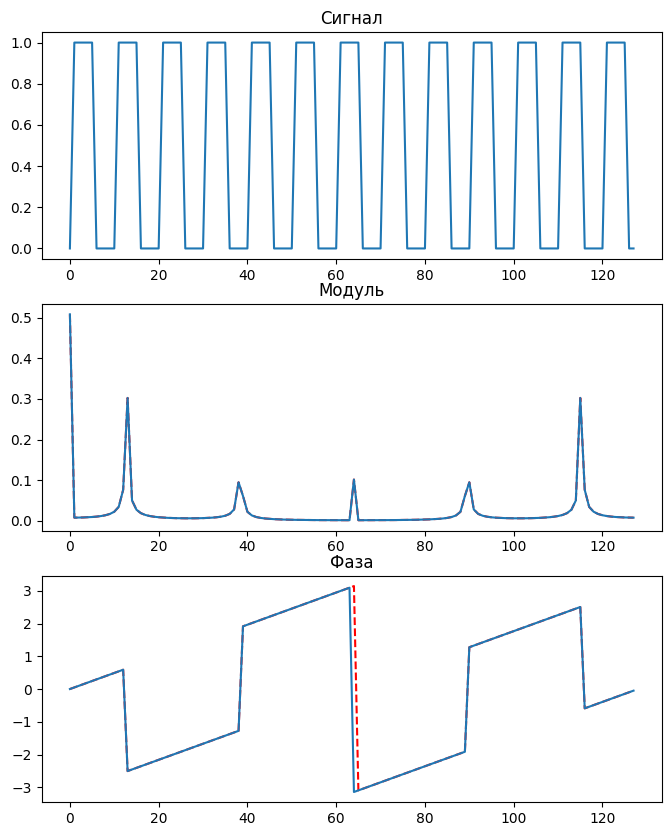

In [163]:
fig = plt.figure()
fig.set_size_inches(8, 10)
get_len(x, fig, 311, 'Сигнал', x = np.arange(2**7))
ax = fig.add_subplot(312)
ax.plot(np.abs(np.fft.fft(x)/len(x)), 'r--')
ax.plot(np.abs(fur/len(x)))
plt.title('Модуль')
ax = fig.add_subplot(313)
ax.plot(np.angle(np.fft.fft(x)), 'r--')
ax.plot(np.angle(fur))
plt.title('Фаза')
fig.show()

6. Покажите  базисные  функции  преобразования  Фурье(ограничьтесь 
только  косинусным  преобразованием),  Уолша  и  Хаара.  Базис  Уолша 
можно сформировать с помощью матрицы [1 1; 1 -1] и кронекеровского 
перемножения этой матрицы саму на себя. 

In [167]:
uorh = np.matrix([
    [1, 1],
    [1, -1]
])
uorh = np.kron(np.kron(uorh, uorh), uorh)
uorh

matrix([[ 1,  1,  1,  1,  1,  1,  1,  1],
        [ 1, -1,  1, -1,  1, -1,  1, -1],
        [ 1,  1, -1, -1,  1,  1, -1, -1],
        [ 1, -1, -1,  1,  1, -1, -1,  1],
        [ 1,  1,  1,  1, -1, -1, -1, -1],
        [ 1, -1,  1, -1, -1,  1, -1,  1],
        [ 1,  1, -1, -1, -1, -1,  1,  1],
        [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [168]:
haara = np.matrix([
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, -1, -1],
    [1, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, -1]
])
haara

matrix([[ 1,  1,  1,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1, -1, -1, -1, -1],
        [ 1,  1, -1, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  1, -1, -1],
        [ 1, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1, -1]])

In [211]:
def haara(items, n = None):
    hist = [items]
    data = items
    for item in range(int(np.log2(len(data)))):
        a = []
        b = []
        for i in range(0, len(data), 2):
            a.append((data[i]+data[i+1])/2)
            b.append((data[i]-data[i+1])/2)
        hist.append((a,b))
        data = a
    return hist

In [213]:
haara([1,  1,  1,  1,  1,  1,  1,  1])


[[1, 1, 1, 1, 1, 1, 1, 1],
 ([1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0]),
 ([1.0, 1.0], [0.0, 0.0]),
 ([1.0], [0.0])]